In [9]:
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [10]:
N = 1000

# Erstelle zufällig eingabe
x =torch.rand(N, 2)




In [11]:
print(x.shape)

torch.Size([1000, 2])


In [5]:
x

tensor([[0.5139, 0.4471],
        [0.7451, 0.9200],
        [0.8583, 0.7057],
        ...,
        [0.1558, 0.3920],
        [0.1137, 0.0674],
        [0.3249, 0.9165]])

In [12]:
# Definiere Funktion f, welche aus Eingabewerten eine eindimensionale Ausgabe erzeugt.
def f(x):
    val = x[:,0]  + x[:,1]
    return val

In [13]:
y = f(x)
#y = torch.rand(N, 1)


In [14]:
y

tensor([0.8839, 1.2259, 0.7010, 0.5695, 1.0139, 1.9113, 0.8553, 1.7569, 0.3183,
        0.9682, 1.1935, 1.4536, 1.1496, 0.2591, 0.9796, 0.8305, 1.1569, 1.0671,
        1.0414, 1.1043, 1.1626, 1.2499, 1.4882, 1.1714, 0.6656, 0.5466, 1.3226,
        1.2159, 0.4210, 0.7748, 0.9037, 1.3877, 1.4918, 1.6701, 1.3571, 0.7417,
        1.5097, 1.0387, 1.1238, 1.7025, 0.9262, 1.0571, 0.4867, 1.4659, 1.1931,
        1.2155, 0.8592, 1.4125, 0.4396, 1.0931, 0.6156, 1.7532, 0.5862, 1.1637,
        0.9294, 1.6431, 1.2014, 0.4234, 1.8656, 1.2711, 1.0639, 0.4654, 1.0836,
        0.5662, 1.7921, 0.4551, 0.8290, 0.2094, 0.4888, 0.6072, 0.8474, 1.5760,
        1.2304, 1.1167, 1.2034, 0.2653, 0.8945, 0.8519, 1.3378, 0.9175, 1.4101,
        1.0555, 1.1359, 1.3051, 1.5717, 1.4661, 1.7017, 1.6448, 0.3020, 1.2123,
        0.9234, 1.5537, 0.7759, 0.5397, 1.4170, 0.4573, 0.3618, 0.5414, 0.5238,
        1.4923, 1.2599, 0.1014, 0.7358, 1.1557, 0.5711, 1.7748, 0.3127, 1.2232,
        1.4263, 1.0606, 0.9887, 0.3307, 

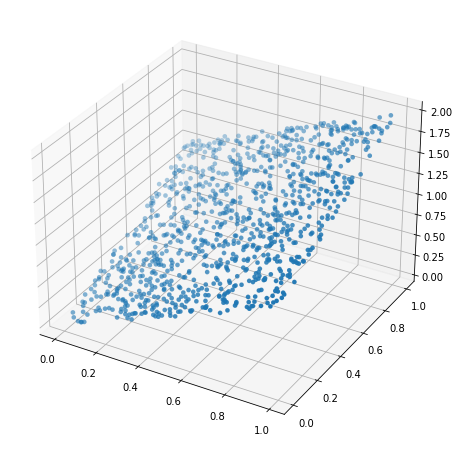

In [15]:
fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.gca(projection='3d')

ax.scatter(x[:,0].tolist(), x[:,1].tolist(),y.tolist(), linewidth=0.1, antialiased=True)

plt.show()

In [16]:
model = torch.nn.Sequential(
          torch.nn.Linear(x.shape[1], 5),
          torch.nn.Tanh(),
          torch.nn.Linear(5, 1), 
        )

loss_fn = torch.nn.MSELoss(reduction='sum')

# Training

In [29]:
training = []

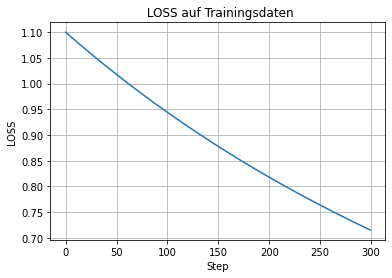

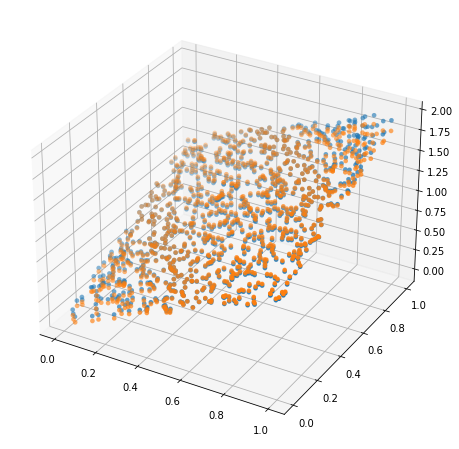

In [35]:
learning_rate = 1e-4


for t in range(50):
      
    
    y_pred = model(x)

  
    loss = loss_fn(torch.reshape(y_pred, (-1,)), y)
    training.append([loss, model.named_parameters()])
  
    model.zero_grad()

    loss.backward()
    
    with torch.no_grad():
        for param in model.parameters():
            param.data -= learning_rate * param.grad

loss = [step[0] for step in training]
fig, ax = plt.subplots()

ax.plot(loss)

ax.set(ylabel='LOSS', xlabel='Step',
       title=' LOSS auf Trainingsdaten')
ax.grid()

#fig.savefig("test.png")
plt.show()


fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.gca(projection='3d')

ax.scatter(x[:,0].tolist(), x[:,1].tolist(),y.tolist(), linewidth=0.1, antialiased=True)
ax.scatter(x[:,0].tolist(), x[:,1].tolist(),torch.reshape(y_pred, (-1,)).tolist(), linewidth=0.1, antialiased=True)

plt.show()


In [36]:
for step in training:
    print('-----------------------------------------')
    for name, param in step[1]:
            print(param.data) 
            print(name, param)

-----------------------------------------
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]])
0.weight Parameter containing:
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]], requires_grad=True)
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933])
0.bias Parameter containing:
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933], requires_grad=True)
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]])
2.weight Parameter containing:
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]], requires_grad=True)
tensor([0.2371])
2.bias Parameter containing:
tensor([0.2371], requires_grad=True)
-----------------------------------------
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]])
0.weight Parameter containing:
tensor([

tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]])
0.weight Parameter containing:
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]], requires_grad=True)
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933])
0.bias Parameter containing:
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933], requires_grad=True)
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]])
2.weight Parameter containing:
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]], requires_grad=True)
tensor([0.2371])
2.bias Parameter containing:
tensor([0.2371], requires_grad=True)
-----------------------------------------
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]])
0.weight Parameter containing:
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6

2.weight Parameter containing:
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]], requires_grad=True)
tensor([0.2371])
2.bias Parameter containing:
tensor([0.2371], requires_grad=True)
-----------------------------------------
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]])
0.weight Parameter containing:
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]], requires_grad=True)
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933])
0.bias Parameter containing:
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933], requires_grad=True)
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]])
2.weight Parameter containing:
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]], requires_grad=True)
tensor([0.2371])
2.bias Parameter containing:
tensor([0.2371], requires_grad=True)
--------------------------------

tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]])
0.weight Parameter containing:
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]], requires_grad=True)
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933])
0.bias Parameter containing:
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933], requires_grad=True)
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]])
2.weight Parameter containing:
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]], requires_grad=True)
tensor([0.2371])
2.bias Parameter containing:
tensor([0.2371], requires_grad=True)
-----------------------------------------
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]])
0.weight Parameter containing:
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6

2.bias Parameter containing:
tensor([0.2371], requires_grad=True)
-----------------------------------------
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]])
0.weight Parameter containing:
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]], requires_grad=True)
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933])
0.bias Parameter containing:
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933], requires_grad=True)
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]])
2.weight Parameter containing:
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]], requires_grad=True)
tensor([0.2371])
2.bias Parameter containing:
tensor([0.2371], requires_grad=True)
-----------------------------------------
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
  

2.weight Parameter containing:
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]], requires_grad=True)
tensor([0.2371])
2.bias Parameter containing:
tensor([0.2371], requires_grad=True)
-----------------------------------------
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]])
0.weight Parameter containing:
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]], requires_grad=True)
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933])
0.bias Parameter containing:
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933], requires_grad=True)
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]])
2.weight Parameter containing:
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]], requires_grad=True)
tensor([0.2371])
2.bias Parameter containing:
tensor([0.2371], requires_grad=True)
--------------------------------

0.weight Parameter containing:
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]], requires_grad=True)
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933])
0.bias Parameter containing:
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933], requires_grad=True)
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]])
2.weight Parameter containing:
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]], requires_grad=True)
tensor([0.2371])
2.bias Parameter containing:
tensor([0.2371], requires_grad=True)
-----------------------------------------
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]])
0.weight Parameter containing:
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]], requires_grad=True)
tensor([ 0.4345,  0.2985,  0.5

tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]])
2.weight Parameter containing:
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]], requires_grad=True)
tensor([0.2371])
2.bias Parameter containing:
tensor([0.2371], requires_grad=True)
-----------------------------------------
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]])
0.weight Parameter containing:
tensor([[-0.2344,  0.0925],
        [-0.4511, -0.6368],
        [-0.7324, -0.0829],
        [ 0.4216, -0.4835],
        [-0.5904, -0.4242]], requires_grad=True)
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933])
0.bias Parameter containing:
tensor([ 0.4345,  0.2985,  0.5261, -0.2410, -0.0933], requires_grad=True)
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]])
2.weight Parameter containing:
tensor([[ 0.0513, -1.0084, -0.3718, -0.1933, -0.9673]], requires_grad=True)
tensor([0.2371])
2.bias Parameter containing:
tensor([0.237

In [37]:
y -torch.reshape(y_pred, (-1,))

tensor([-7.5094e-03,  7.7183e-03, -2.1623e-02,  1.8784e-02,  3.5345e-02,
        -1.6619e-02, -1.7937e-02, -1.8131e-02, -2.1550e-02, -2.3065e-02,
        -2.0015e-02,  5.4696e-03,  4.3621e-02, -2.4053e-02,  5.9410e-02,
        -2.5146e-02, -2.1183e-02, -1.8087e-02,  3.1301e-02, -1.7060e-02,
        -2.4361e-02, -2.2436e-02, -2.0536e-02, -1.8377e-02, -2.3684e-02,
        -8.9331e-03, -2.4680e-02, -8.0384e-03, -1.5004e-03, -2.4863e-02,
        -1.2994e-02, -1.5047e-02,  1.3437e-02, -1.8536e-02,  3.1994e-02,
         5.7240e-02, -2.4651e-02, -1.6237e-02, -1.7393e-02,  3.2130e-02,
        -2.3706e-02, -1.4527e-02,  4.4703e-03,  5.9074e-02,  4.7851e-02,
        -1.8781e-02,  6.9044e-03, -1.5947e-02, -1.1795e-03,  1.2370e-02,
         4.4009e-02, -1.7179e-02,  3.0588e-02,  3.1101e-03, -1.7676e-02,
         1.9446e-02, -1.4186e-02, -1.0932e-02, -1.7712e-02, -1.7980e-02,
         4.5357e-02, -1.8284e-02, -2.0666e-02, -1.4641e-02, -1.9080e-02,
         1.7990e-03, -4.3159e-03,  3.0468e-02,  4.9

# Test

0.7608563899993896


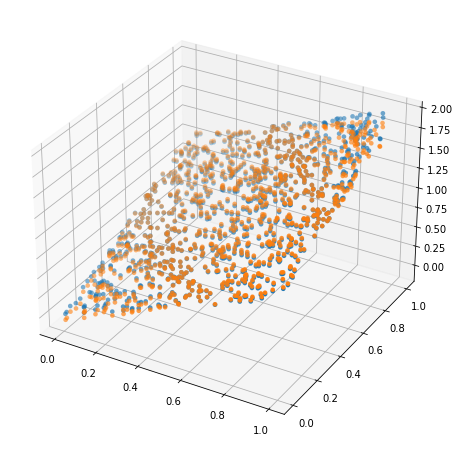

In [41]:
N = 1000

# Erstelle zufällig eingabe
x =torch.rand(N, 2)

y = f(x)

y_pred = model(x)


loss = loss_fn(torch.reshape(y_pred, (-1,)), y)

fig = plt.figure()
fig.set_size_inches(12, 8)
ax = fig.gca(projection='3d')

ax.scatter(x[:,0].tolist(), x[:,1].tolist(),y.tolist(), linewidth=0.1, antialiased=True)
ax.scatter(x[:,0].tolist(), x[:,1].tolist(),torch.reshape(y_pred, (-1,)).tolist(), linewidth=0.1, antialiased=True)
print(loss.item())
plt.show()